Data preprocessing


In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

data = pd.read_csv('maize_data.csv') 


In [54]:
print("Initial shape:", data.shape)
print("\nData Types:\n", data.dtypes)
print("\nMissing Values:\n", data.isnull().sum())
print("\nDuplicate Rows:", data.duplicated().sum())


Initial shape: (1000, 5)

Data Types:
 Year                   int64
Cost_Tsh_per_kg        int64
Rainfall_mm            int64
Total_Production_MT    int64
Mbeya_Population       int64
dtype: object

Missing Values:
 Year                   0
Cost_Tsh_per_kg        0
Rainfall_mm            0
Total_Production_MT    0
Mbeya_Population       0
dtype: int64

Duplicate Rows: 0


In [55]:
data = data.drop_duplicates()
data = data.dropna()  
print("\nShape after removing duplicates:", data.shape)



Shape after removing duplicates: (1000, 5)


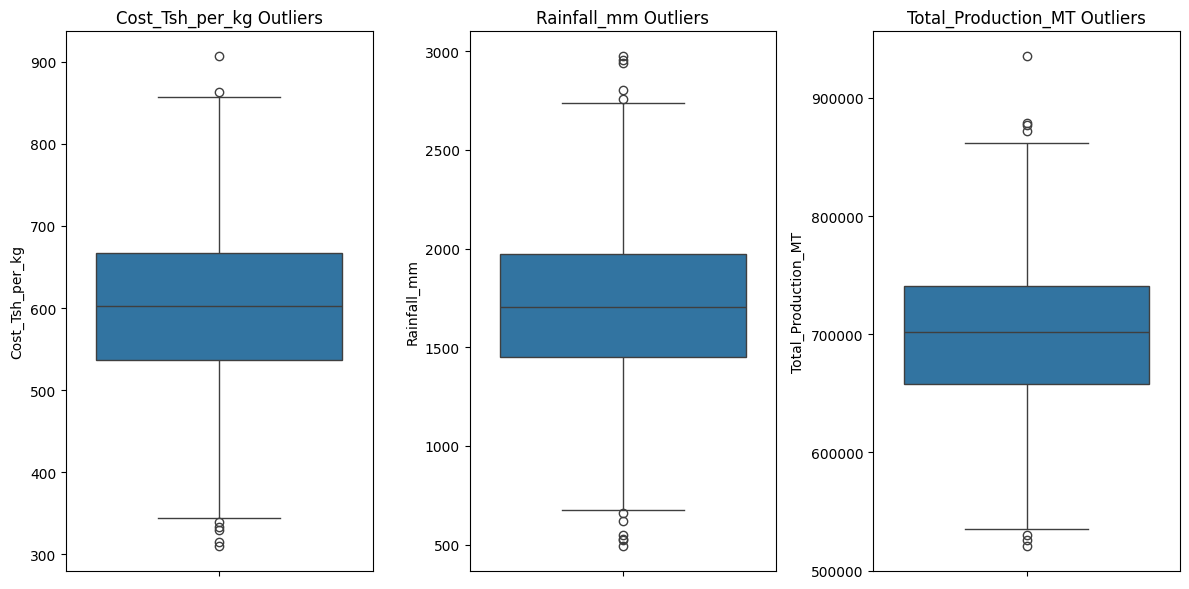

In [56]:
# checking outliers using boxplots
plt.figure(figsize=(12, 6))
for i, column in enumerate(['Cost_Tsh_per_kg', 'Rainfall_mm', 'Total_Production_MT'], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=data[column])
    plt.title(f'{column} Outliers')
plt.tight_layout()
plt.show()

outliers are shown using circle dots on the grapg, so we need to remove them

In [57]:

def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]


In [58]:
#  outlier removal 
for col in ['Cost_Tsh_per_kg', 'Rainfall_mm', 'Total_Production_MT']:
    data = remove_outliers(data, col)

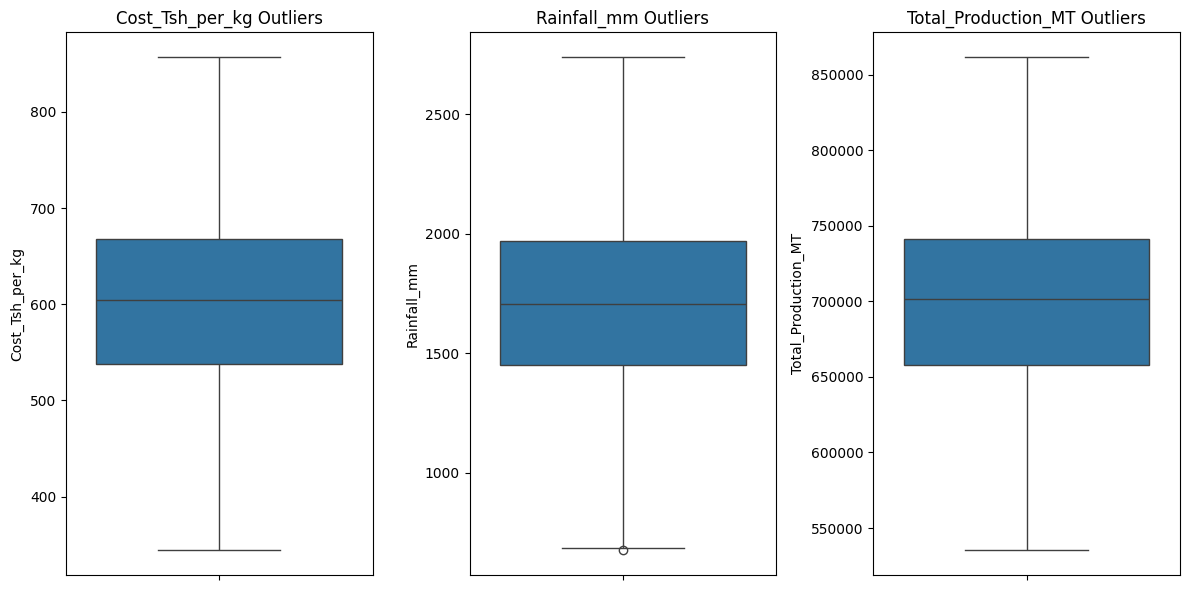

In [59]:
# checking if outlier are removed
plt.figure(figsize=(12, 6))
for i, column in enumerate(['Cost_Tsh_per_kg', 'Rainfall_mm', 'Total_Production_MT'], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=data[column])
    plt.title(f'{column} Outliers')
plt.tight_layout()
plt.show()

In [60]:
print("\nShape after outlier removal:", data.shape)
data.describe()


Shape after outlier removal: (975, 5)


,Year,Cost_Tsh_per_kg,Rainfall_mm,Total_Production_MT,Mbeya_Population
count,975.000000,975.000000,975.000000,975.000000,9.750000e+02
mean,2018.421538,604.882051,1710.326154,700506.550769,2.730397e+06
std,4.110355,97.382728,374.589470,59326.552060,1.475108e+04
min,2012.000000,344.000000,675.000000,535149.000000,2.707410e+06
25%,2015.000000,538.000000,1453.000000,657564.000000,2.718106e+06
50%,2018.000000,604.000000,1705.000000,701434.000000,2.728845e+06
75%,2022.000000,668.000000,1969.000000,740902.000000,2.743230e+06
max,2025.000000,857.000000,2740.000000,861582.000000,2.754068e+06


data visualization just to see them before training

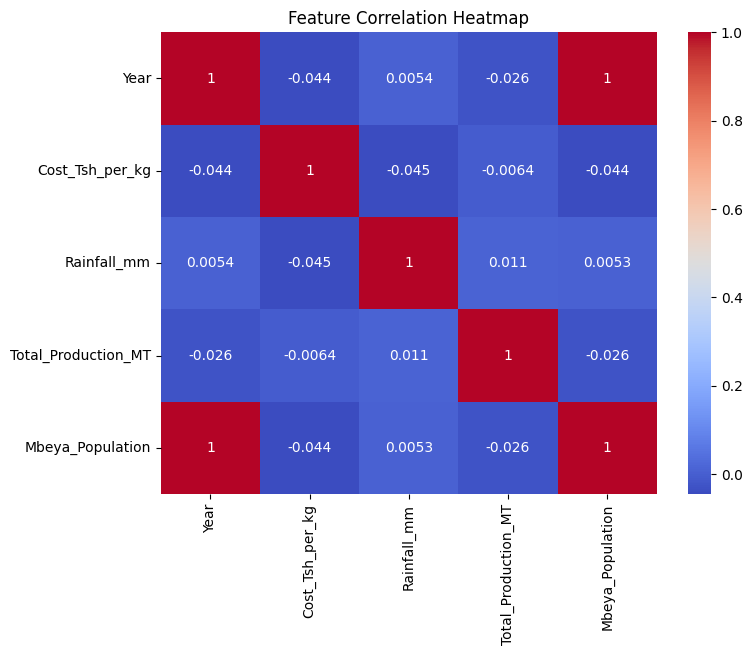

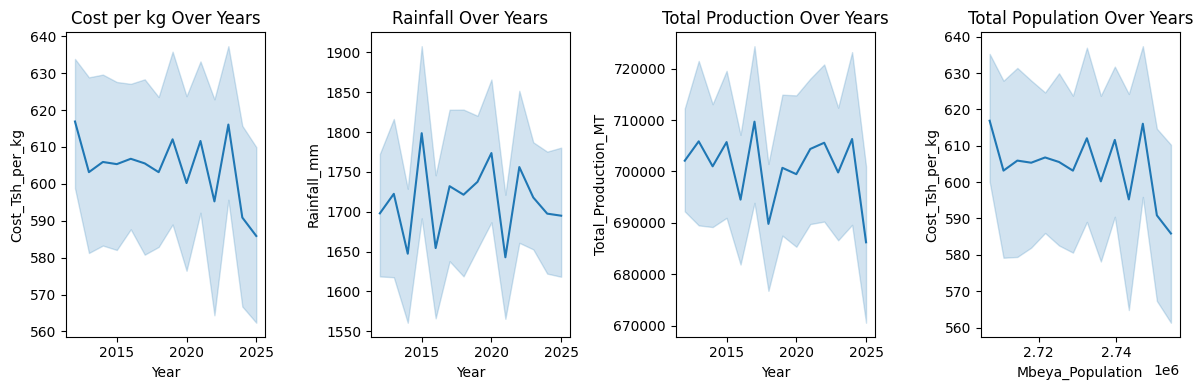

In [61]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Step 9: Visualize trends
plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
sns.lineplot(data=data.sort_values('Year'), x='Year', y='Cost_Tsh_per_kg')
plt.title('Cost per kg Over Years')

plt.subplot(1, 4, 2)
sns.lineplot(data=data.sort_values('Year'), x='Year', y='Rainfall_mm')
plt.title('Rainfall Over Years')

plt.subplot(1, 4, 3)
sns.lineplot(data=data.sort_values('Year'), x='Year', y='Total_Production_MT')
plt.title('Total Production Over Years')


plt.subplot(1, 4, 4)
sns.lineplot(data=data.sort_values('Mbeya_Population'), x='Mbeya_Population', y='Cost_Tsh_per_kg')
plt.title('Total Population Over Years')
plt.tight_layout()
plt.show()

creating model pipelining and tyraining

In [62]:
data

,Year,Cost_Tsh_per_kg,Rainfall_mm,Total_Production_MT,Mbeya_Population
0,2018,429,1896,673794,2728845
1,2015,594,1993,603605,2718106
2,2024,638,1965,804975,2750450
3,2022,596,2169,782887,2743230
4,2019,393,1772,622464,2732434
...,...,...,...,...,...
995,2019,541,1630,694125,2732434
996,2023,583,1790,836346,2746837
997,2025,628,1552,753342,2754068
998,2018,575,1647,734424,2728845


In [63]:
X = data.drop(columns=['Cost_Tsh_per_kg'])
y = data['Cost_Tsh_per_kg']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [65]:

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

model evaluation

In [66]:
y_pred = model.predict(X_test)

# Evaluate
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R² score:", r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 81.60045133773954
Mean Squared Error (MSE): 10208.478103233148
R² score: -0.014644043161887721


In [67]:
import joblib
joblib.dump(model, 'model.pkl')


['model.pkl']

In [68]:
# import pickle

# # Assume: model is your trained LinearRegression and df is your training DataFrame
# with open("model.pkl", "wb") as f:
#     pickle.dump({"model": model, "data": data}, f)


In [69]:
import joblib
# Save model and data in a dictionary (portable way)
joblib.dump({"model": model, "data": pd.concat([X, y], axis=1)}, "model.pkl")

['model.pkl']